In [1]:
import os

packages = [
    "numpy==1.26.4",
    "pandas==2.2.2",
    "scikit-learn==1.5.1",
    "tensorflow==2.17.0",
    "keras==3.5.0",
    "torch==2.4.1+cpu",
    "xgboost==2.1.1",
    "lightgbm==4.5.0",
    "catboost==1.2.7",
    "matplotlib==3.9.2",
    "seaborn==0.13.2",
    "nltk==3.9.1",
    "transformers==4.51.2",
]

for package in packages:
    os.system(f"pip install {package}")

In [125]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\vinay\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [41]:
# Core Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
import sklearn  # (No short name – we import submodules separately when needed)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Deep Learning libraries
import keras

# NLP libraries
import nltk


# I was not able to import "torch", "import tensorflow as tf" and "from transformers import pipeline" so I have skipped it for now

In [2]:
df = pd.read_csv(r'C:\Users\vinay\Desktop\GNICPL Internship\Datasets\dataset 1\heart_attack_prediction_india\heart_attack_prediction_india.csv')

# Data Inspection and Cleaning

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,9,248,125,93,42,93,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,4,272,51,153,47,134,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,6,268,213,130,54,104,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,9,224,250,130,79,91,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,5,277,129,150,23,141,109,0,0,9,0,0,209,97987,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,6,160,238,171,30,133,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,5,257,241,193,77,124,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,2,205,69,199,41,151,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,5,155,288,151,66,127,60,1,0,7,1,0,313,153207,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [6]:
summary_stats = df.describe()

In [7]:
missing_values = df.isnull().sum()

In [8]:
summary_stats, missing_values

(        Patient_ID           Age      Diabetes  Hypertension       Obesity  \
 count  10000.00000  10000.000000  10000.000000   10000.00000  10000.000000   
 mean    5000.50000     49.394900      0.092900       0.24690      0.303700   
 std     2886.89568     17.280301      0.290307       0.43123      0.459878   
 min        1.00000     20.000000      0.000000       0.00000      0.000000   
 25%     2500.75000     35.000000      0.000000       0.00000      0.000000   
 50%     5000.50000     49.000000      0.000000       0.00000      0.000000   
 75%     7500.25000     64.000000      0.000000       0.00000      1.000000   
 max    10000.00000     79.000000      1.000000       1.00000      1.000000   
 
             Smoking  Alcohol_Consumption  Physical_Activity    Diet_Score  \
 count  10000.000000         10000.000000       10000.000000  10000.000000   
 mean       0.301400             0.352800           0.595800      5.021700   
 std        0.458889             0.477865           0

# Feature Engineering

In [9]:
def age_group(age):
    if age <= 30:
        return 'Young Adult'
    elif age <= 45:
        return 'Middle-aged Adult'
    elif age <= 60:
        return 'Senior Adult'
    else:
        return 'Elderly'

df['Age_Group'] = df['Age'].apply(age_group)

print(df[['Age', 'Age_Group']].head())

   Age          Age_Group
0   42  Middle-aged Adult
1   26        Young Adult
2   78            Elderly
3   58       Senior Adult
4   22        Young Adult


In [10]:
def cholesterol_status(cholesterol):
    if cholesterol < 200:
        return 'Desirable'
    elif cholesterol < 240:
        return 'Borderline High'
    else:
        return 'High'

df['Cholesterol_Status'] = df['Cholesterol_Level'].apply(cholesterol_status)

print(df[['Cholesterol_Level', 'Cholesterol_Status']].head())

   Cholesterol_Level Cholesterol_Status
0                248               High
1                272               High
2                268               High
3                224    Borderline High
4                277               High


In [11]:
def lifestyle_score(row):
    score = 0
    if row['Smoking'] == 1:
        score += 1
    if row['Alcohol_Consumption'] == 1:
        score += 1
    if row['Physical_Activity'] == 0:
        score -= 1
    return score

df['Lifestyle_Score'] = df.apply(lifestyle_score, axis=1)

print(df[['Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Lifestyle_Score']].head())

   Smoking  Alcohol_Consumption  Physical_Activity  Lifestyle_Score
0        1                    0                  0                0
1        0                    1                  1                1
2        0                    0                  1                0
3        0                    0                  1                0
4        0                    0                  1                0


# Univariate Analysis

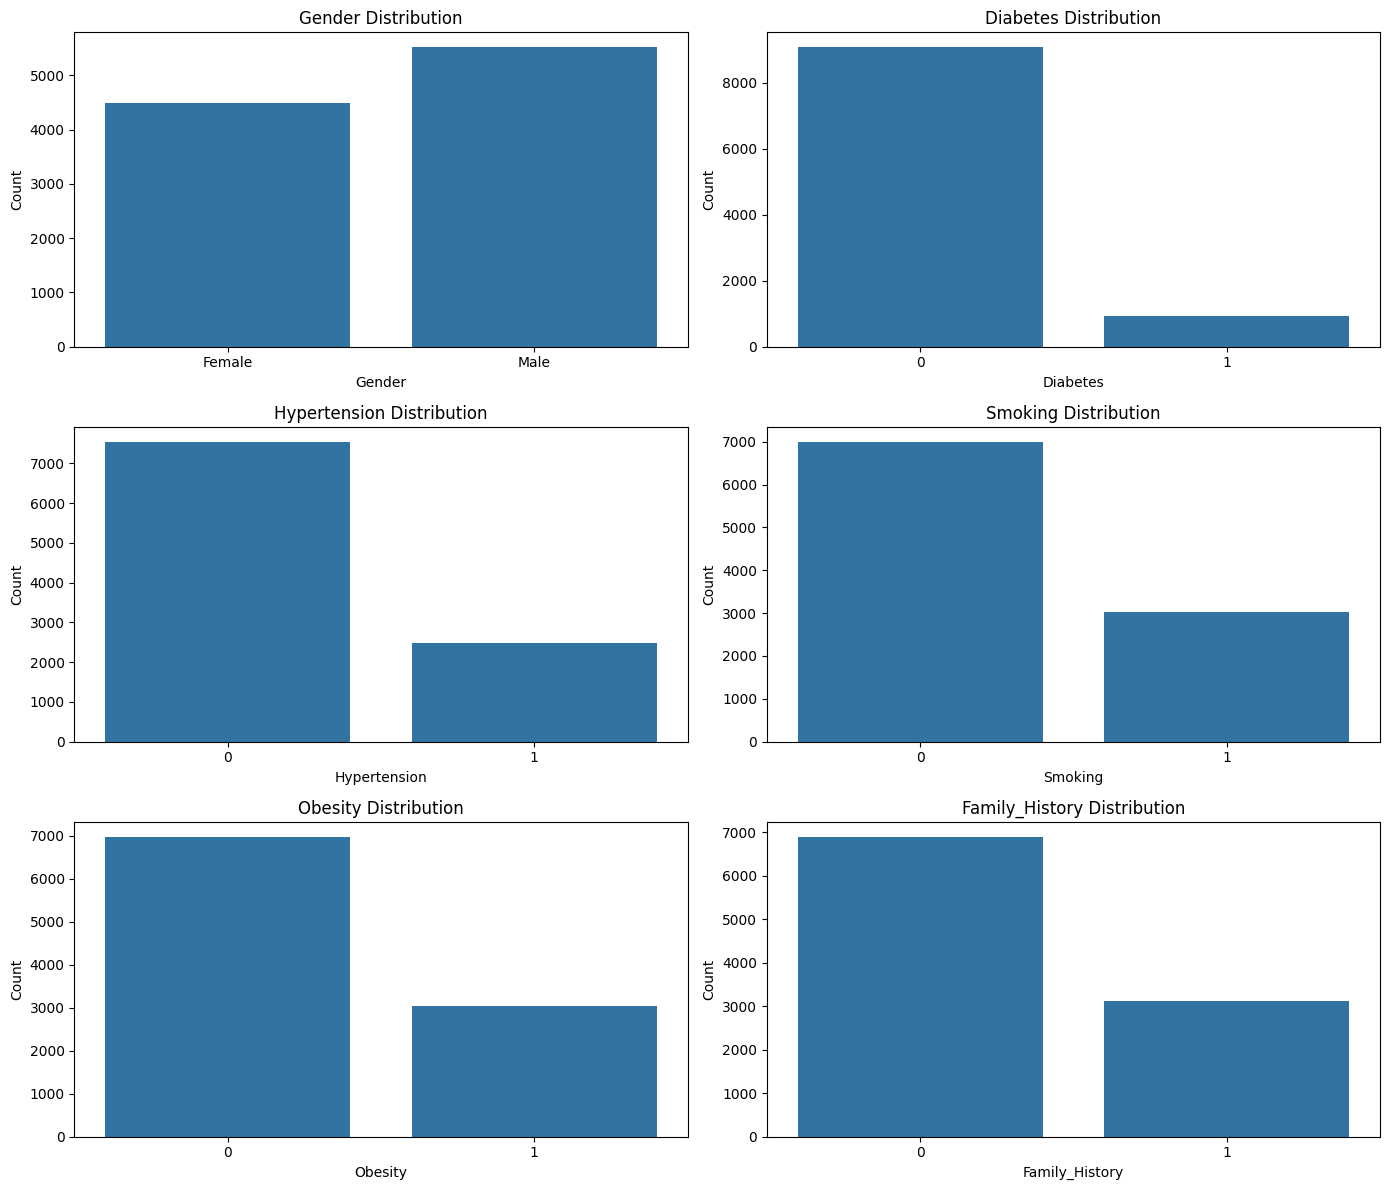

In [12]:
categorical_cols = ['Gender', 'Diabetes', 'Hypertension', 'Smoking', 'Obesity', 'Family_History']

plt.figure(figsize=(14, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i) 
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

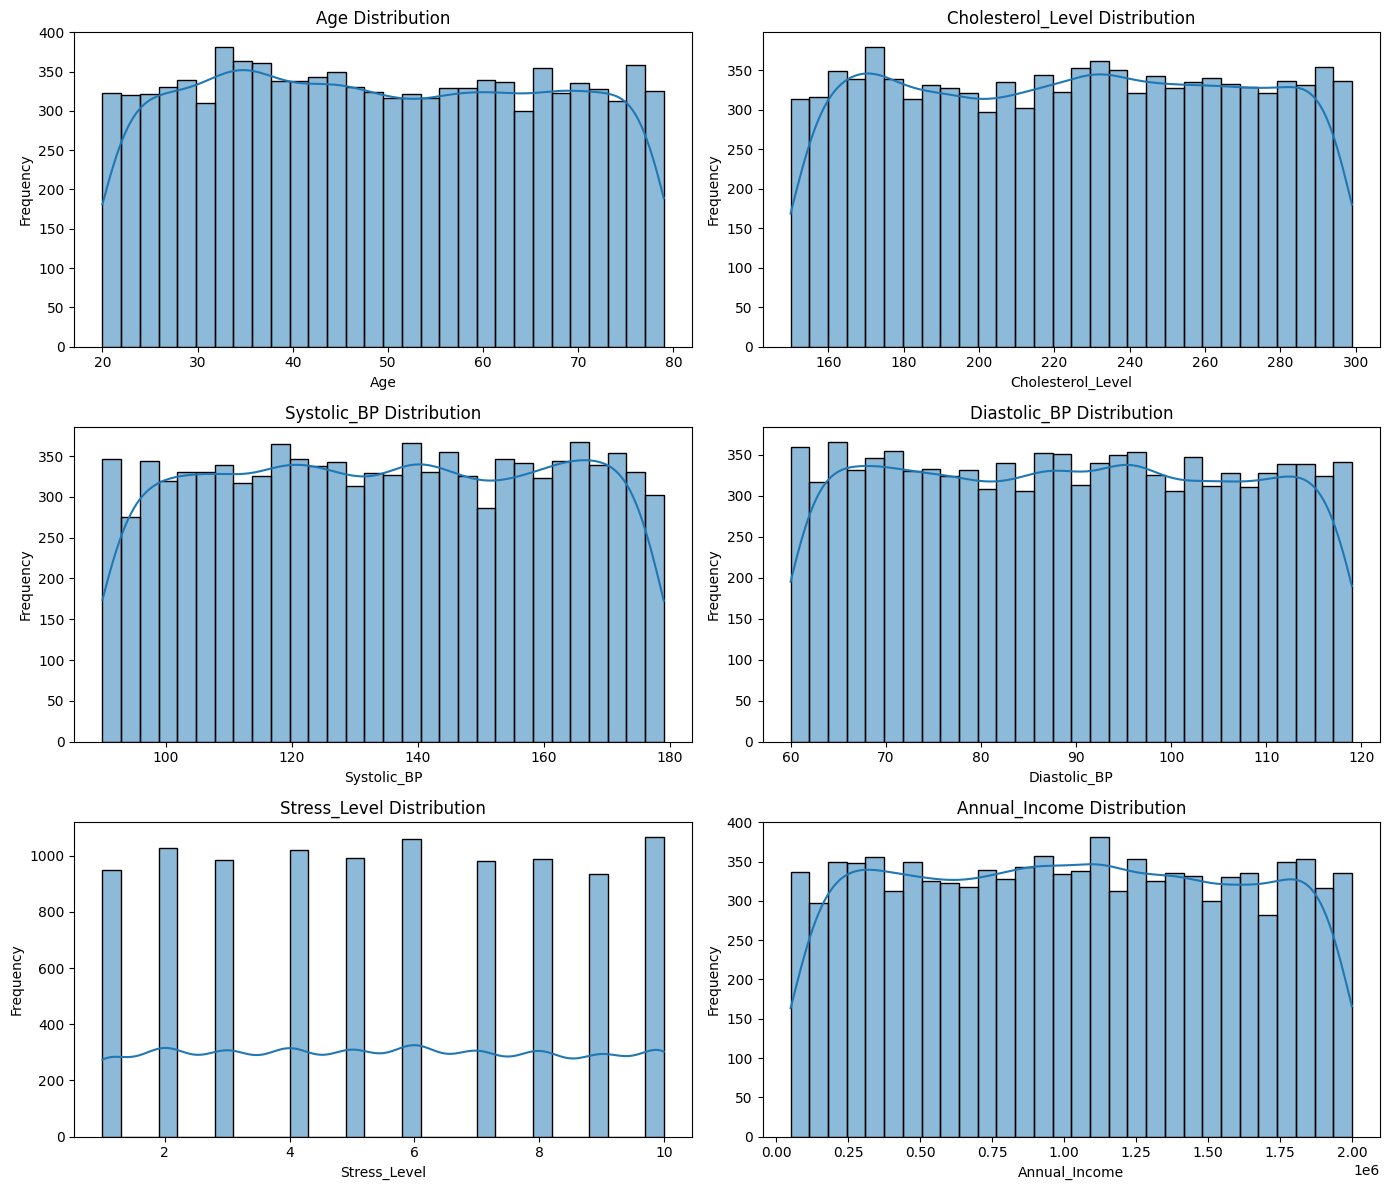

In [13]:
numerical_cols = ['Age', 'Cholesterol_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level', 'Annual_Income']

plt.figure(figsize=(14, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bivariate Analysis

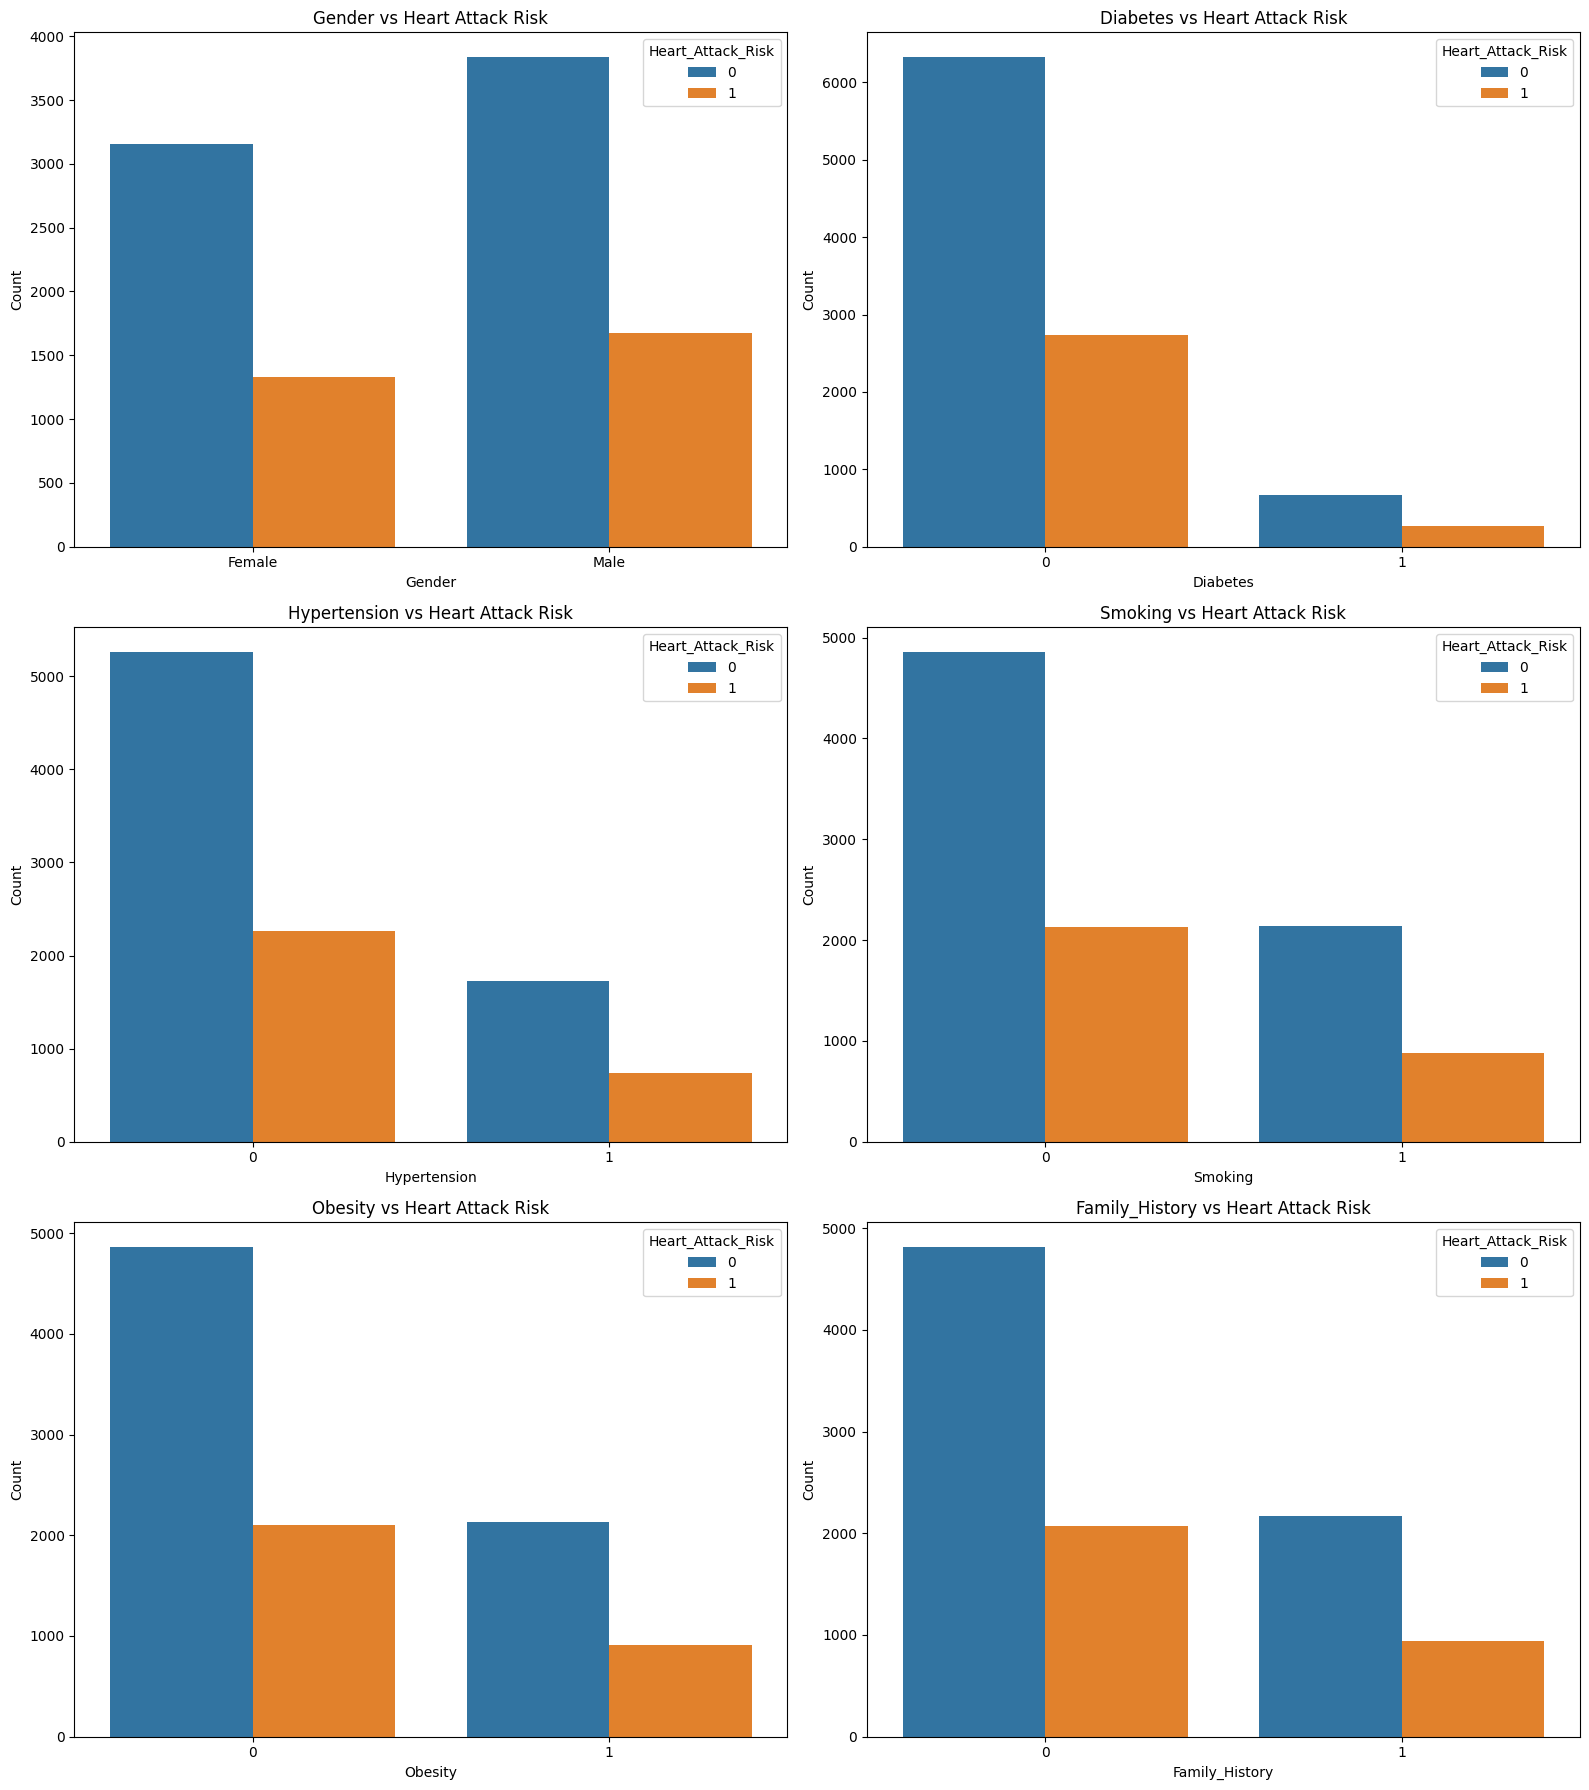

In [17]:
catagorical_cols = ['Gender', 'Diabetes', 'Hypertension', 'Smoking', 'Obesity', 'Family_History']

plt.figure(figsize=(16, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Heart_Attack_Risk', data=df)
    plt.title(f'{col} vs Heart Attack Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [40]:
categorical_cols = ['Gender', 'Diabetes', 'Hypertension', 'Smoking', 'Obesity', 'Family_History']

for col in categorical_cols:
    print(f" {col} vs Heart_Attack_Risk \n")
     
    ct = pd.crosstab(df[col], df['Heart_Attack_Risk'], margins=True)
    print(ct)
    
    print("\n Percentage of Heart Attacks in each group: \n")
    
    ct_percent = (ct[1] / ct['All']) * 100
    print(ct_percent)

 Gender vs Heart_Attack_Risk 

Heart_Attack_Risk     0     1    All
Gender                              
Female             3154  1330   4484
Male               3839  1677   5516
All                6993  3007  10000

 Percentage of Heart Attacks in each group: 

Gender
Female    29.661017
Male      30.402466
All       30.070000
dtype: float64
 Diabetes vs Heart_Attack_Risk 

Heart_Attack_Risk     0     1    All
Diabetes                            
0                  6331  2740   9071
1                   662   267    929
All                6993  3007  10000

 Percentage of Heart Attacks in each group: 

Diabetes
0      30.206151
1      28.740581
All    30.070000
dtype: float64
 Hypertension vs Heart_Attack_Risk 

Heart_Attack_Risk     0     1    All
Hypertension                        
0                  5264  2267   7531
1                  1729   740   2469
All                6993  3007  10000

 Percentage of Heart Attacks in each group: 

Hypertension
0      30.102244
1      29.971648

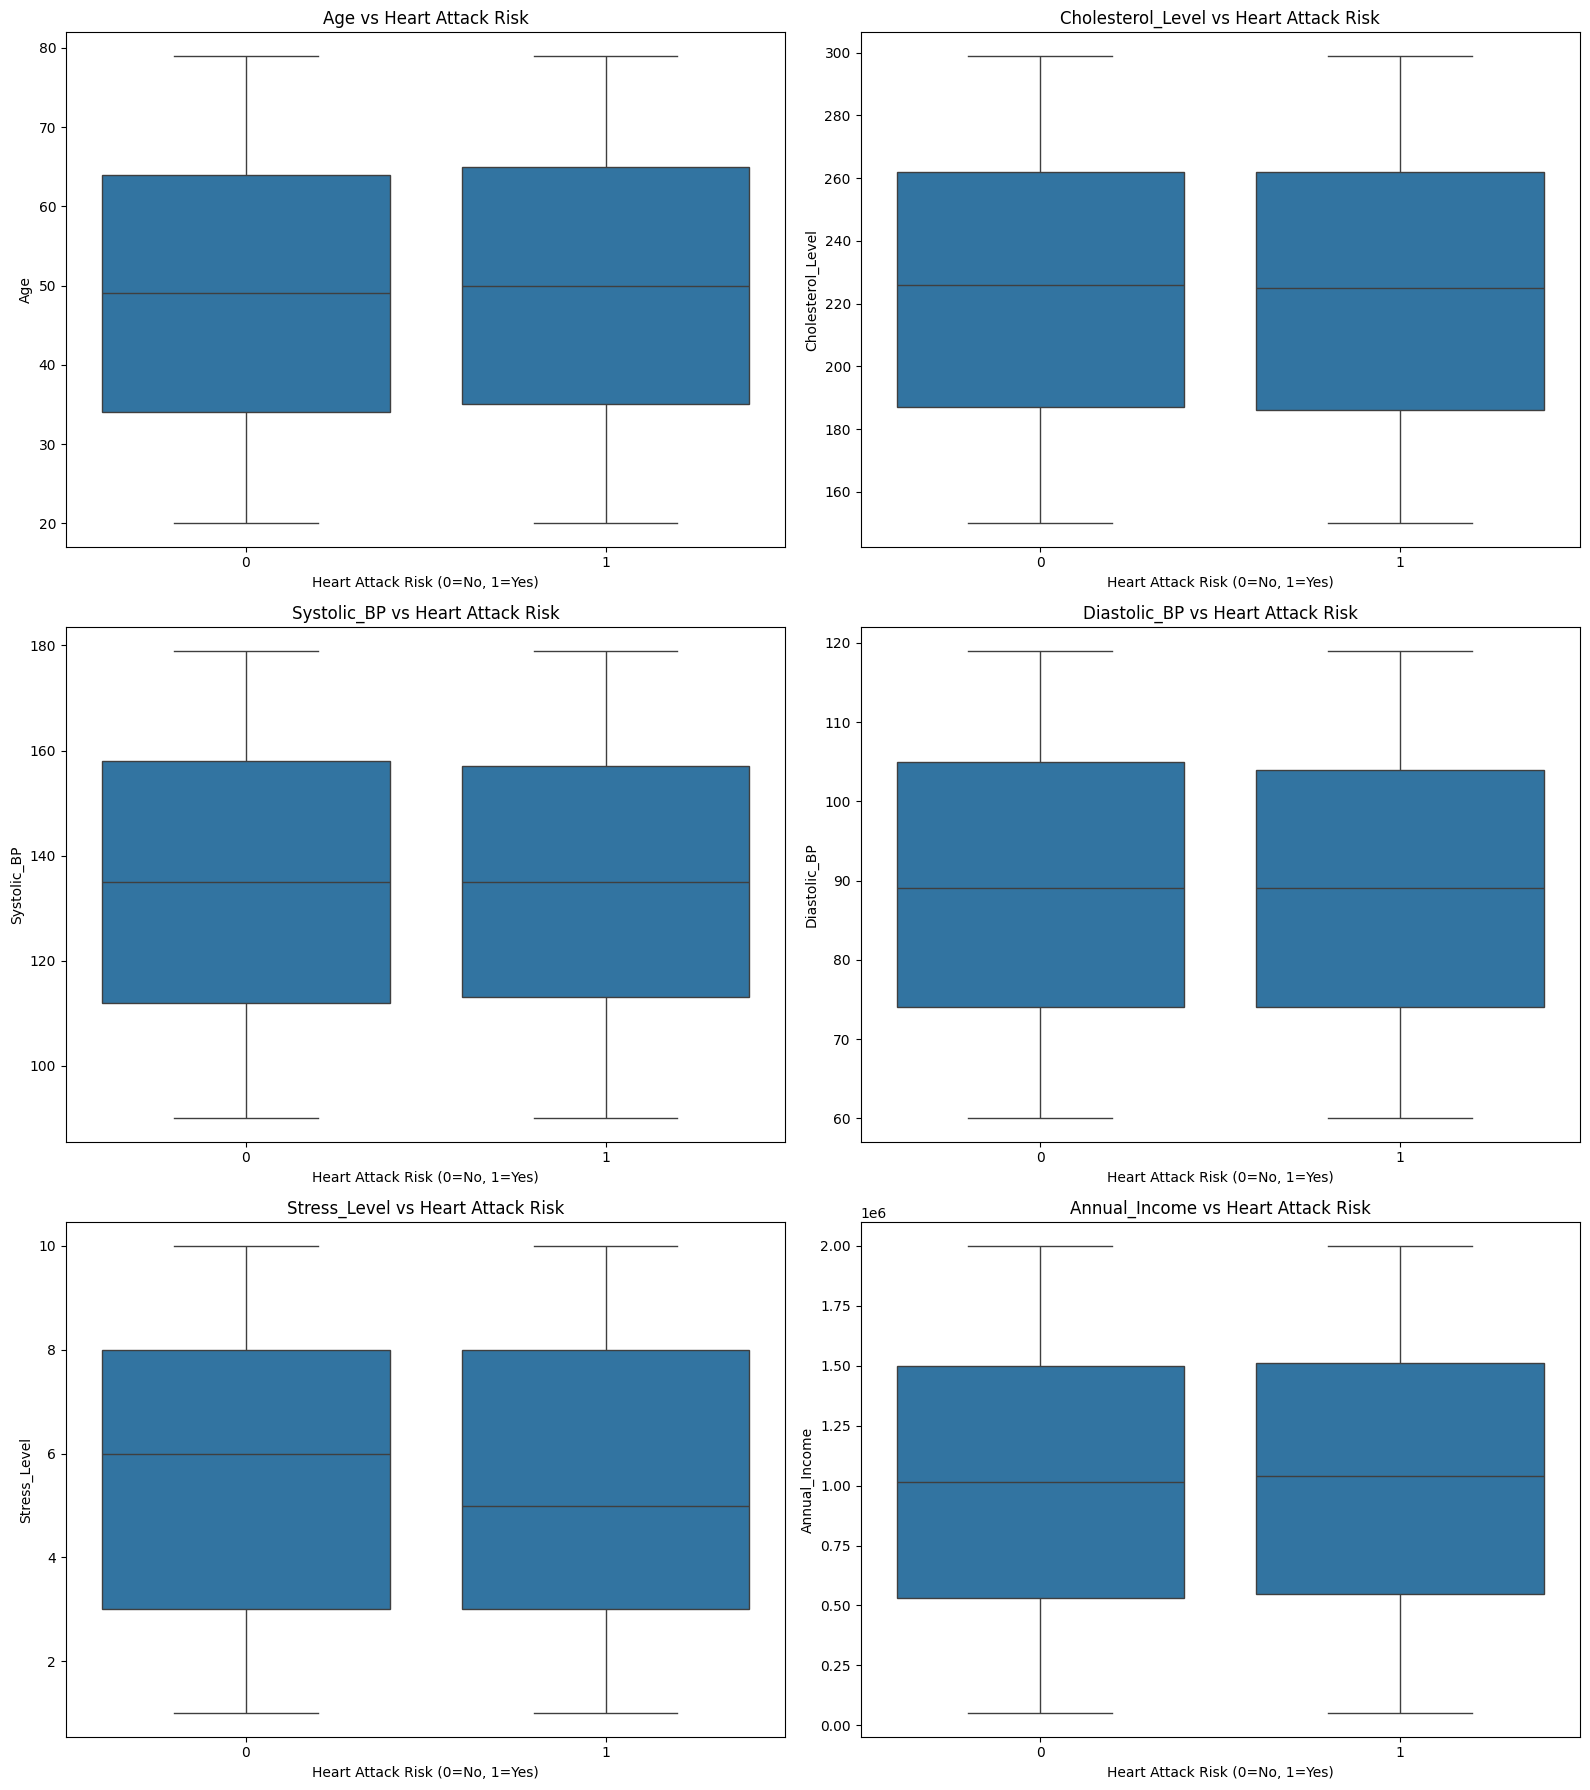

In [70]:
numerical_cols = ['Age', 'Cholesterol_Level', 'Systolic_BP', 'Diastolic_BP', 'Stress_Level', 'Annual_Income']

plt.figure(figsize=(16, 18))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Heart_Attack_Risk', y=col, data=df)
    plt.title(f'{col} vs Heart Attack Risk')
    plt.xlabel('Heart Attack Risk (0=No, 1=Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

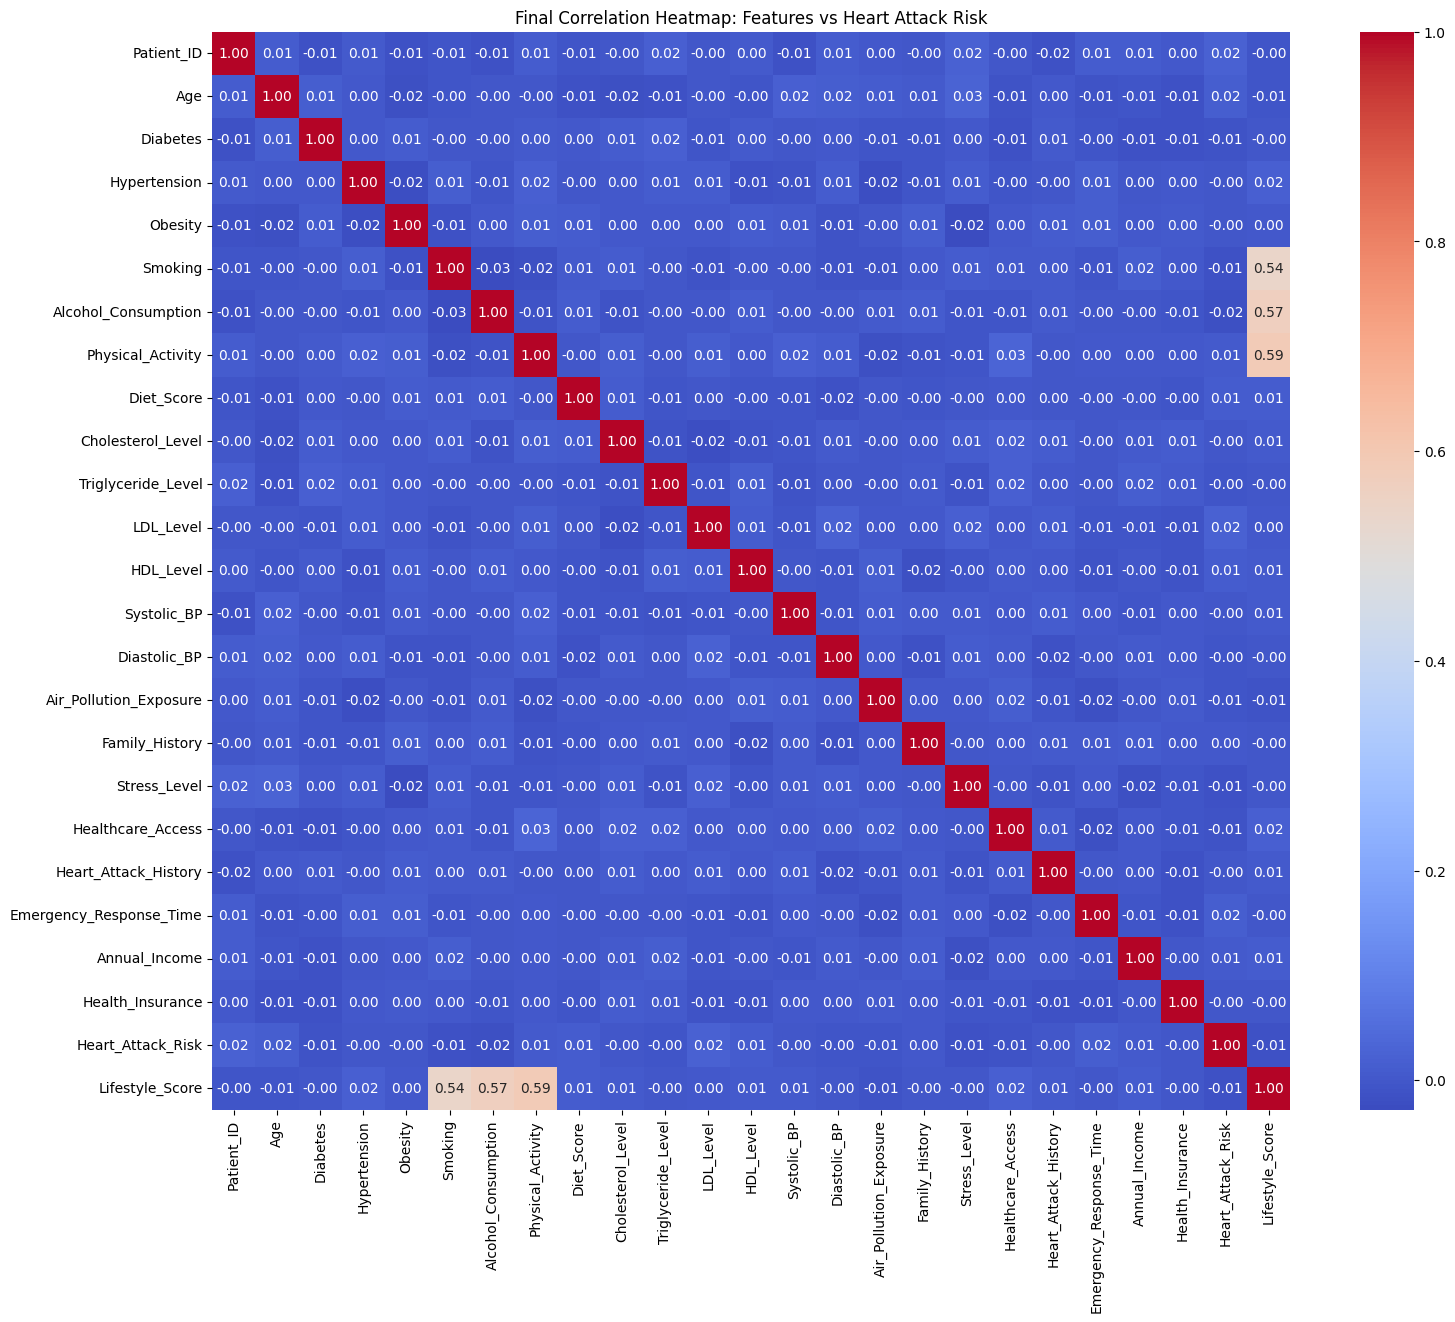

In [71]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

correlation = df[numeric_cols].corr()


plt.figure(figsize=(18, 14))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Final Correlation Heatmap: Features vs Heart Attack Risk')
plt.show()

In [72]:
df.to_csv('heart_attack_prediction_updated.csv', index=False)

#  Feature Importance of Feature Selection

In [151]:
x = df.drop(['Heart_Attack_Risk', 'State_Name', 'Patient_ID'], axis=1)
y = df['Heart_Attack_Risk']

In [152]:
categorical_cols = ['Gender', 'Age_Group', 'Cholesterol_Status']

x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

print(x.head)
print(x.shape)
print(y.shape)

<bound method NDFrame.head of       Age  Diabetes  Hypertension  Obesity  Smoking  Alcohol_Consumption  \
0      42         0             0        1        1                    0   
1      26         0             0        0        0                    1   
2      78         0             0        1        0                    0   
3      58         1             0        1        0                    0   
4      22         0             0        0        0                    0   
...   ...       ...           ...      ...      ...                  ...   
9995   20         0             0        0        1                    0   
9996   34         0             0        0        0                    0   
9997   76         0             0        0        0                    0   
9998   52         0             0        0        0                    0   
9999   25         0             1        0        1                    0   

      Physical_Activity  Diet_Score  Cholesterol_Level  T

In [153]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x, y)

importances = rf.feature_importances_

In [76]:
feature_importance_df = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
20                 Annual_Income    0.086045
19       Emergency_Response_Time    0.084003
9             Triglyceride_Level    0.083147
10                     LDL_Level    0.079335
8              Cholesterol_Level    0.076702
12                   Systolic_BP    0.076198
11                     HDL_Level    0.075659
13                  Diastolic_BP    0.073115
0                            Age    0.068652
7                     Diet_Score    0.049790
16                  Stress_Level    0.047118
22               Lifestyle_Score    0.020344
23                   Gender_Male    0.013298
21              Health_Insurance    0.013140
14        Air_Pollution_Exposure    0.012887
3                        Obesity    0.012557
15                Family_History    0.012171
2                   Hypertension    0.011956
6              Physical_Activity    0.011696
17             Healthcare_Access    0.011646
4                        Smoking    0.011107
5         

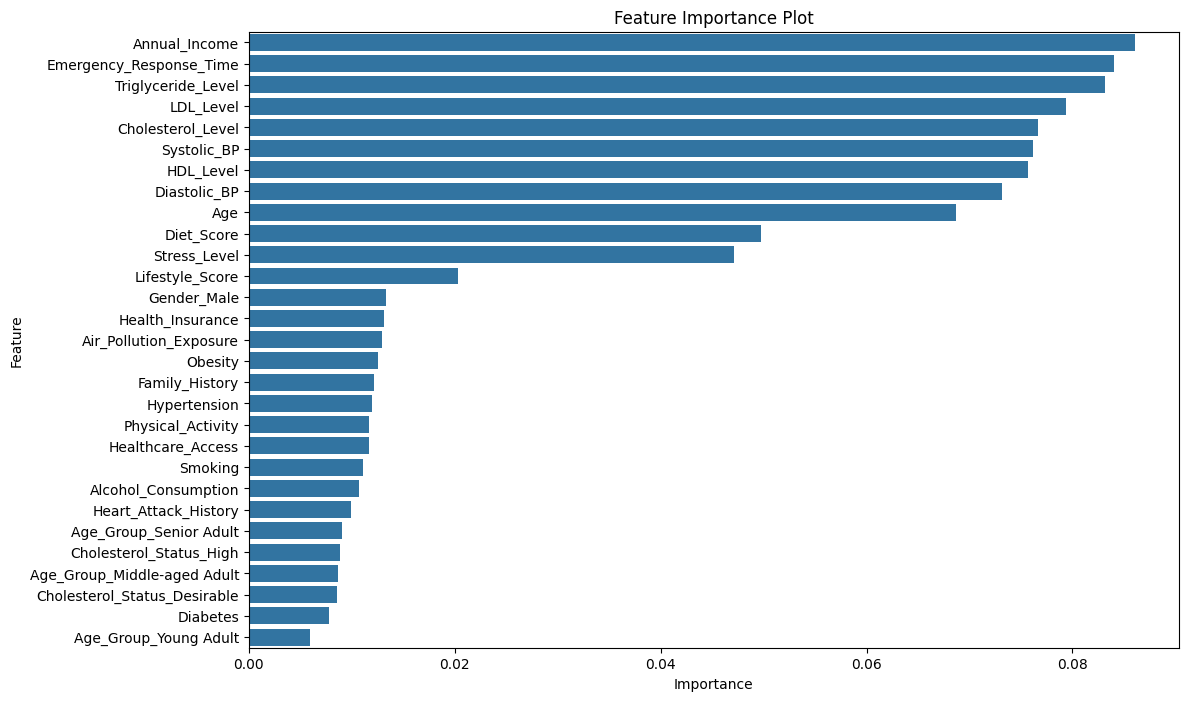

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='Importance', y = 'Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.show()

In [79]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

x_selected = x[selected_features]

In [98]:
print(selected_features)
print('\n', x_selected.shape)

['Annual_Income', 'Emergency_Response_Time', 'Triglyceride_Level', 'LDL_Level', 'Cholesterol_Level', 'Systolic_BP', 'HDL_Level', 'Diastolic_BP', 'Age', 'Diet_Score', 'Stress_Level', 'Lifestyle_Score', 'Gender_Male', 'Health_Insurance', 'Air_Pollution_Exposure', 'Obesity', 'Family_History', 'Hypertension', 'Physical_Activity', 'Healthcare_Access', 'Smoking', 'Alcohol_Consumption']

 (10000, 22)


# Model Building
# Random Forest

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8000, 22)
Shape of X_test: (2000, 22)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [105]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

print("Random Forest Model Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Performance:

Accuracy: 0.704

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1411
           1       0.29      0.00      0.01       589

    accuracy                           0.70      2000
   macro avg       0.50      0.50      0.42      2000
weighted avg       0.58      0.70      0.58      2000


Confusion Matrix:
 [[1406    5]
 [ 587    2]]


# Logistic Regression

In [111]:
print(df.shape)
print(x.shape)
print(y.shape)
print(x_selected.shape)

(10000, 29)
(10000, 29)
(10000,)
(10000, 22)


In [113]:
df.to_csv('heart_attack_prediction_updated.csv', index=False)
x.to_csv('x.csv', index=False)
y.to_csv('y.csv', index=False)
x_selected.to_csv('x_selected.csv', index=False)

In [117]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [120]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(x_train_scaled, y_train)

y_pred_logreg = logreg_model.predict(x_test_scaled)

print("Logistic Regression Model Performance (after scaling):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Model Performance (after scaling):

Accuracy: 0.7055

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1411
           1       0.00      0.00      0.00       589

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000


Confusion Matrix:
 [[1411    0]
 [ 589    0]]


C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# XG Boost

In [122]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric= 'logloss', random_state=42)

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

print("XGBoost Model Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Model Performance:

Accuracy: 0.659

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.79      1411
           1       0.29      0.11      0.15       589

    accuracy                           0.66      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.58      0.66      0.60      2000


Confusion Matrix:
 [[1256  155]
 [ 527   62]]


C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [124]:
df.to_csv('df_cleaned.csv', index=False)
x.to_csv('x.csv', index=False)
y.to_csv('y.csv', index=False)
x_selected.to_csv('x_selected.csv', index=False)
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# SMOTE Balancing

In [141]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Shape before SMOTE:", x_train.shape)
print("Shape after SMOTE", x_train_smote.shape)

print("\nClass distribution after SMOTE")
print(y_train_smote.value_counts())

Shape before SMOTE: (8000, 22)
Shape after SMOTE (11164, 22)

Class distribution after SMOTE
Heart_Attack_Risk
0    5582
1    5582
Name: count, dtype: int64


# Retraining Models

In [142]:
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_smote.fit(x_train_smote, y_train_smote)

y_pred_rf_smote = rf_model_smote.predict(x_test)

print("Random Forest (After SMOTE) Performance:\n")
print("Accuracy", accuracy_score(y_test, y_pred_rf_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_smote))

Random Forest (After SMOTE) Performance:

Accuracy 0.662

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79      1411
           1       0.31      0.13      0.18       589

    accuracy                           0.66      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.59      0.66      0.61      2000


Confusion Matrix:
 [[1250  161]
 [ 515   74]]


In [143]:
xgb_model_smote = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state=42)

xgb_model_smote.fit(x_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_model_smote.predict(x_test)

print("XGBoost (After SMOTE) Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))

XGBoost (After SMOTE) Performance:

Accuracy: 0.6155

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1411
           1       0.30      0.24      0.27       589

    accuracy                           0.62      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.59      0.62      0.60      2000


Confusion Matrix:
 [[1091  320]
 [ 449  140]]


C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [144]:
scaler = StandardScaler()

x_train_smote_scaled = scaler.fit_transform(x_train_smote)

x_test_scaled = scaler.transform(x_test)

logreg_model_smote = LogisticRegression(max_iter=100, random_state=42)

logreg_model_smote.fit(x_train_smote_scaled, y_train_smote)

y_pred_logreg_smote = logreg_model_smote.predict(x_test_scaled)


print("Logistic Regression (After SMOTE) Performance:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_smote))

Logistic Regression (After SMOTE) Performance:

Accuracy: 0.644

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77      1411
           1       0.32      0.18      0.23       589

    accuracy                           0.64      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.59      0.64      0.61      2000


Confusion Matrix:
 [[1182  229]
 [ 483  106]]


In [149]:
df.to_csv("heart_attack_final_preprocessed.csv", index=False)
x_train_smote.to_csv("X_train_smote.csv", index=False)
y_train_smote.to_csv("y_train_smote.csv", index=False)
x_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Retraining the Models with Top 6 Features

In [3]:
x = pd.read_csv(r'C:\Users\vinay\Desktop\GNICPL Internship\Archives\Datasets after Random forest model\x.csv')
y = pd.read_csv(r'C:\Users\vinay\Desktop\GNICPL Internship\Archives\Datasets after Random forest model\y.csv')

In [4]:
selected_features = ['Annual_Income', 'HDL_Level', 'Triglyceride_Level', 'LDL_Level', 'Cholesterol_Level', 'Systolic_BP']

In [18]:
x_selected = x[selected_features]

x_train, x_test, y_train, y_test = train_test_split(x_selected, y.values.ravel(), test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("Random Forest Performance:\n")
print("Accuracy", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Performance:

Accuracy 0.697

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82      1411
           1       0.37      0.04      0.07       589

    accuracy                           0.70      2000
   macro avg       0.54      0.51      0.44      2000
weighted avg       0.61      0.70      0.60      2000


Confusion Matrix:
 [[1371   40]
 [ 566   23]]


In [39]:
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=50, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost Performance:\n")
print("Accuracy", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

XGBoost Performance:

Accuracy 0.682

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81      1411
           1       0.33      0.08      0.12       589

    accuracy                           0.68      2000
   macro avg       0.52      0.51      0.46      2000
weighted avg       0.60      0.68      0.60      2000


Confusion Matrix:
 [[1319   92]
 [ 544   45]]


In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

In [38]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y.values.ravel(), test_size=0.2, random_state=42)

log_model = LogisticRegression(class_weight='balanced')
log_model.fit(x_train_scaled, y_train)
log_pred = log_model.predict(x_test_scaled)

print("Logistic Regression Performance:\n")
print("Accuracy", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))

Logistic Regression Performance:

Accuracy 0.496

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.51      0.59      1411
           1       0.28      0.46      0.35       589

    accuracy                           0.50      2000
   macro avg       0.49      0.48      0.47      2000
weighted avg       0.57      0.50      0.52      2000


Confusion Matrix:
 [[723 688]
 [320 269]]


# Retraining the Models with Top 12 Features

In [42]:
top_12_selected_features = ['Annual_Income', 'Emergency_Response_Time', 'Triglyceride_Level', 'LDL_Level', 'Cholesterol_Level', 
                            'Systolic_BP', 'HDL_Level', 'Diastolic_BP', 'Age', 'Diet_Score', 'Stress_Level', 'Lifestyle_Score']

In [43]:
x_selected = x[top_12_selected_features]

x_train, x_test, y_train, y_test = train_test_split(x_selected, y.values.ravel(), test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("Random Forest Performance:\n")
print("Accuracy", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Performance:

Accuracy 0.7035

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83      1411
           1       0.36      0.01      0.02       589

    accuracy                           0.70      2000
   macro avg       0.53      0.50      0.42      2000
weighted avg       0.60      0.70      0.59      2000


Confusion Matrix:
 [[1402    9]
 [ 584    5]]


In [44]:
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=50, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost Performance:\n")
print("Accuracy", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

XGBoost Performance:

Accuracy 0.6735

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80      1411
           1       0.30      0.08      0.13       589

    accuracy                           0.67      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.59      0.67      0.60      2000


Confusion Matrix:
 [[1297  114]
 [ 539   50]]


In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

In [46]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y.values.ravel(), test_size=0.2, random_state=42)

log_model = LogisticRegression(class_weight='balanced')
log_model.fit(x_train_scaled, y_train)
log_pred = log_model.predict(x_test_scaled)

print("Logistic Regression Performance:\n")
print("Accuracy", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))

Logistic Regression Performance:

Accuracy 0.499

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.59      1411
           1       0.29      0.49      0.36       589

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.58      0.50      0.52      2000


Confusion Matrix:
 [[711 700]
 [302 287]]


# Retrining the Model after SMOTE

In [52]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_selected, y.values.ravel())

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("Random Forest Performance:\n")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Performance:

Accuracy: 0.7047891350964975

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1469
           1       0.71      0.63      0.67      1329

    accuracy                           0.70      2798
   macro avg       0.71      0.70      0.70      2798
weighted avg       0.71      0.70      0.70      2798


Confusion Matrix:
 [[1133  336]
 [ 490  839]]


In [55]:
xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=50, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost Performance:\n")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

XGBoost Performance:

Accuracy: 0.6561829878484632

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66      1469
           1       0.63      0.67      0.65      1329

    accuracy                           0.66      2798
   macro avg       0.66      0.66      0.66      2798
weighted avg       0.66      0.66      0.66      2798


Confusion Matrix:
 [[948 521]
 [441 888]]


In [56]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
log_model = LogisticRegression(class_weight='balanced')
log_model.fit(x_train_scaled, y_train)
log_pred = log_model.predict(x_test_scaled)

print("Logistic Regression Performance:\n")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_pred))

Logistic Regression Performance:

Accuracy: 0.5528949249463903

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56      1469
           1       0.53      0.58      0.55      1329

    accuracy                           0.55      2798
   macro avg       0.55      0.55      0.55      2798
weighted avg       0.56      0.55      0.55      2798


Confusion Matrix:
 [[782 687]
 [564 765]]
